In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

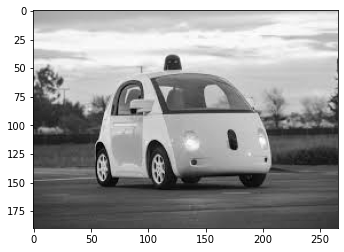

In [2]:
#Change the image path  to file path in another image
img_path = 'images/sdc.jpg'
#Load color image 
bgr_img = cv2.imread(img_path)
#Convert to grayscal eimage
gray_img = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY)
#Normalize,rescale entries to  lie in [0,1]
gray_img = gray_img.astype("float32")/255
#Plot image
plt.imshow(gray_img,cmap='gray')
plt.show()

In [3]:
#Define and visualize filters
import numpy as np
filter_vals  = np.array([[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1]])
print('filter shape:',filter_vals.shape)


filter shape: (4, 4)


In [4]:
#Defining 4 different filters 
filter_1 = filter_vals
filter_2  = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1,filter_2,filter_3,filter_4])
#Print values of  filters
print('filter:\n',filter_1)

filter:
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


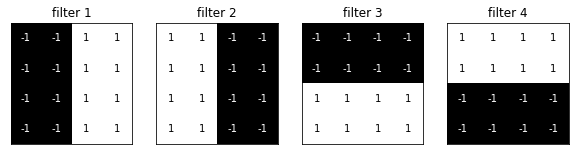

In [5]:
#Visualize 4 filters
fig = plt.figure(figsize=(10,5))
for i in range(4):
    ax = fig.add_subplot(1,4,i+1,xticks = [], yticks =[])
    ax.imshow(filters[i],cmap='gray')
    ax.set_title('filter %s' %str(i+1))
    w,h = filters[i].shape
    for x in range(w):
        for y in range(h):
            ax.annotate(str(filters[i][x][y]),xy=(y,x),horizontalalignment = 'center',verticalalignment = 'center',color='white' if filters[i][x][y] < 0 else 'black')
    

In [6]:
#Define convolutional layer

import torch
import torch.nn as nn
import torch.nn.functional as F


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

    
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        #Define pooling layer
        self.pool =nn.MaxPool2d(4,4)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        #Applies pooling layer
        pooled_x = self.pool(activated_x)
        
        # returns both layers
        return conv_x, activated_x,pooled_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
)


In [8]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))


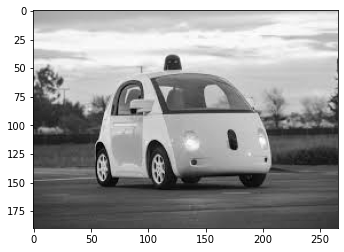

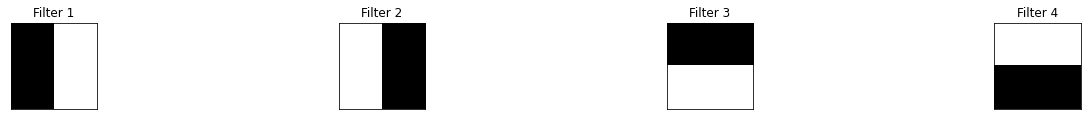

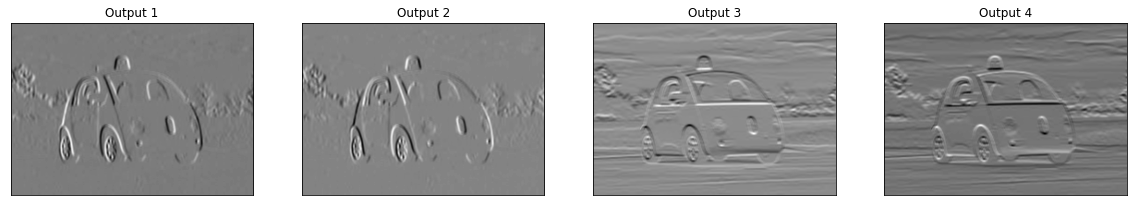

In [9]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

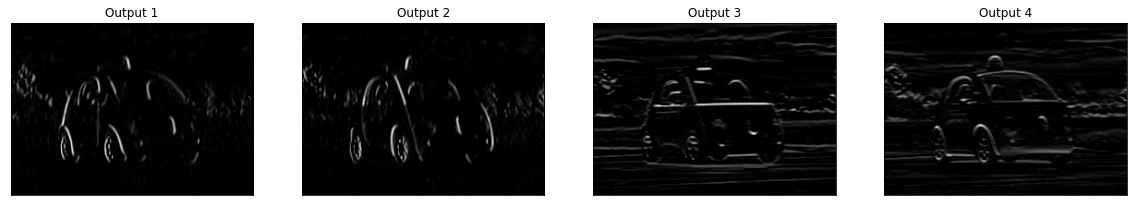

In [80]:
viz_layer(activated_layer)

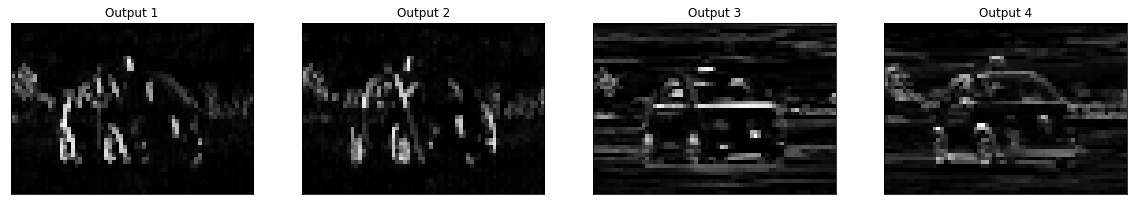

In [81]:
viz_layer(pooled_layer)